# Kaggle challenge Titanic

### 1.Set up Google colaboratory environment

In [1]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive/Kaggle"
!pwd

/content/drive/My Drive/Kaggle
/content/drive/My Drive/Kaggle


In [0]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [0]:
# !chmod 600 /root/.kaggle/kaggle.json


In [1]:
#%cd kaggle_titanic/data/raw/
#!kaggle competitions download -c titanic
#Changing work directory
# %cd kaggle_titanic/
%cd ../

/Users/Cris/Google_drive/Kaggle/kaggle_titanic


In [2]:
# !pip install -U seaborn
#!pip freeze > requirements.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# read datasets

train_df = pd.read_csv("./data/raw/train.csv")
test_df = pd.read_csv("./data/raw/test.csv")

##2.Evaluationary Data Analysis

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
def missing_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns



In [6]:
missing_table(train_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [7]:
missing_table(test_df)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


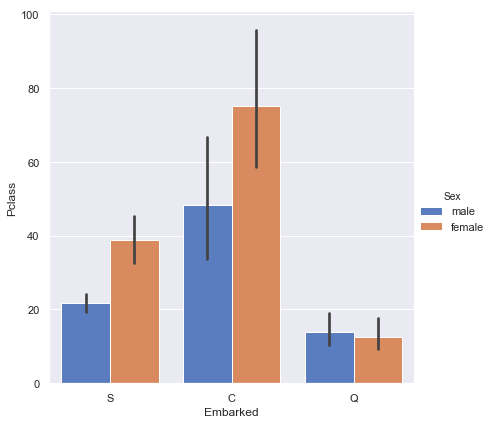

In [9]:
plot = sns.catplot(x="Embarked", y="Fare", hue="Sex", data=train_df,
                height=6, kind="bar", palette="muted")
plot.set_ylabels("Pclass")

plt.show()

In [10]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

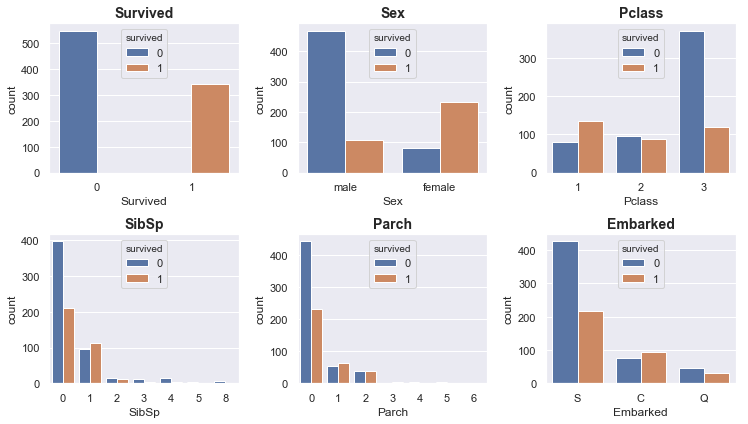

In [12]:
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(train_df[cols[i]], hue=train_df["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout()   

## Seaborn Distplots 
### Distribution of Age as function of Pclass, Sex and Survived

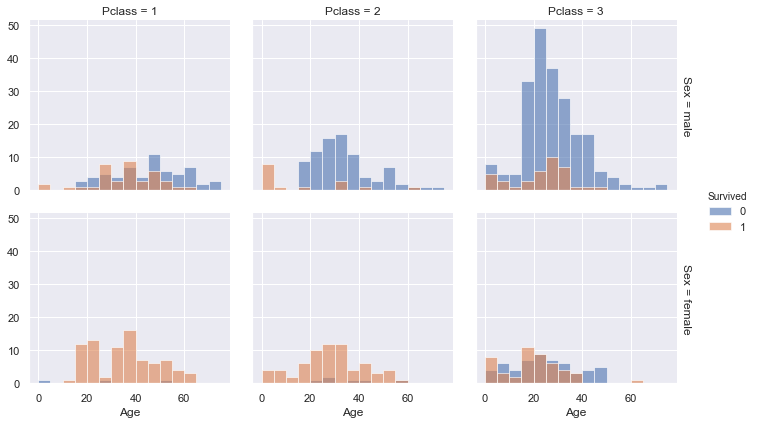

In [13]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train_df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins,hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

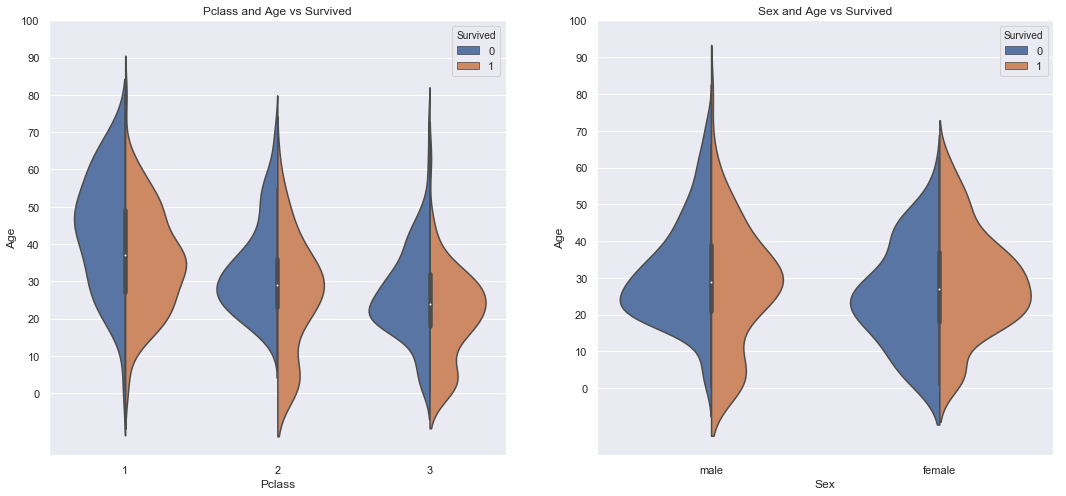

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

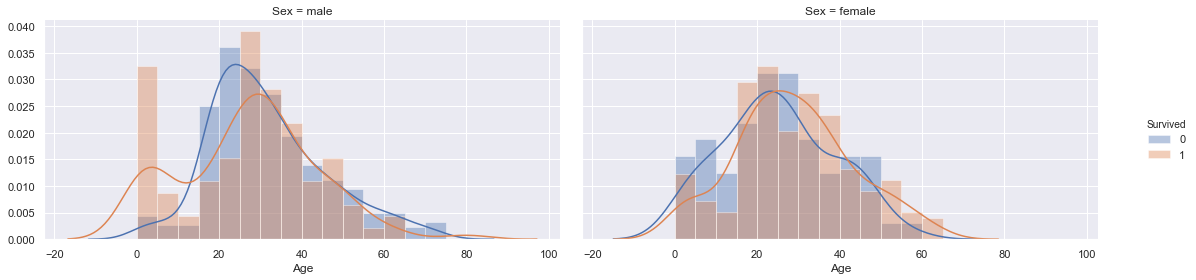

In [15]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train_df, col='Sex', hue='Survived', margin_titles=True, height=4, aspect=2.0)
g.map(sns.distplot, 'Age', kde=True, bins=bins, hist=True)
g.add_legend()  
plt.show()  

In [16]:
train_df['Fare'].max()

512.3292

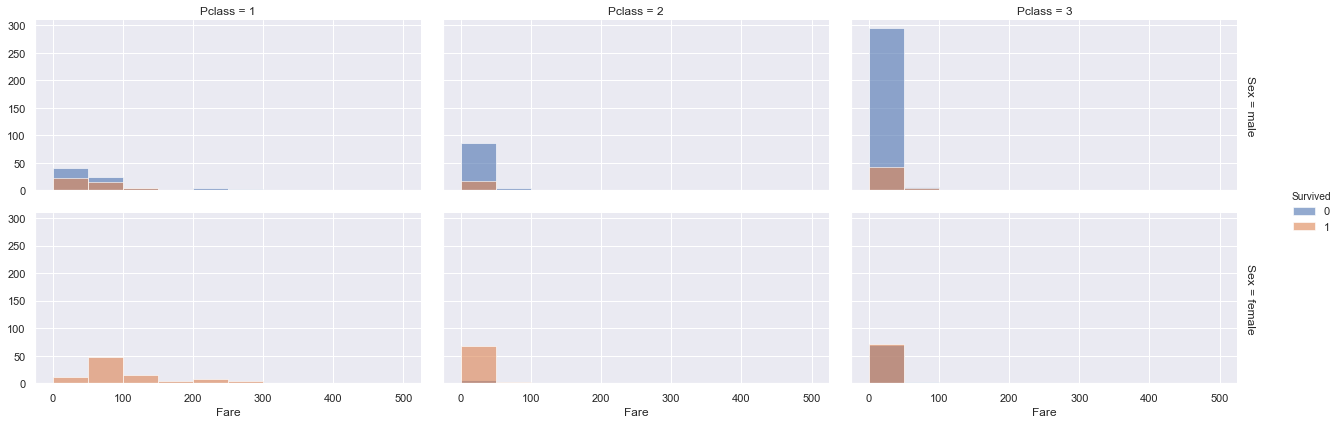

In [17]:
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(train_df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=2.0)
g.map(sns.distplot, 'Fare', kde=False, bins=bins,hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

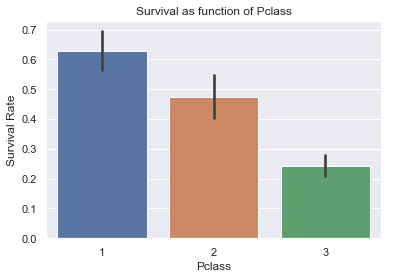

In [18]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

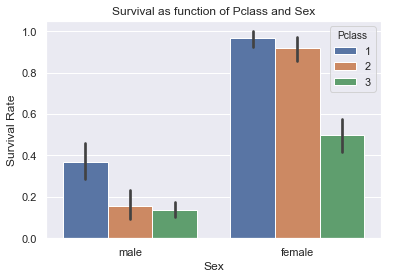

In [19]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

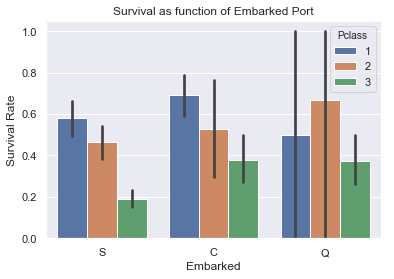

In [20]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

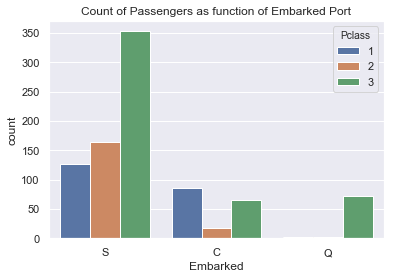

In [21]:
sns.countplot(x='Embarked', hue='Pclass', data=train_df)
plt.title("Count of Passengers as function of Embarked Port")
plt.show()

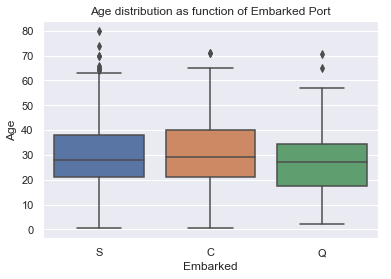

In [22]:
sns.boxplot(x='Embarked', y='Age', data=train_df)
plt.title("Age distribution as function of Embarked Port")
plt.show()

/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


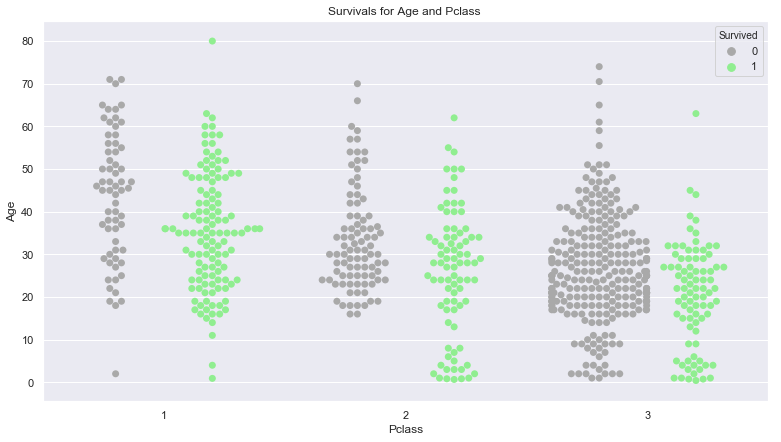

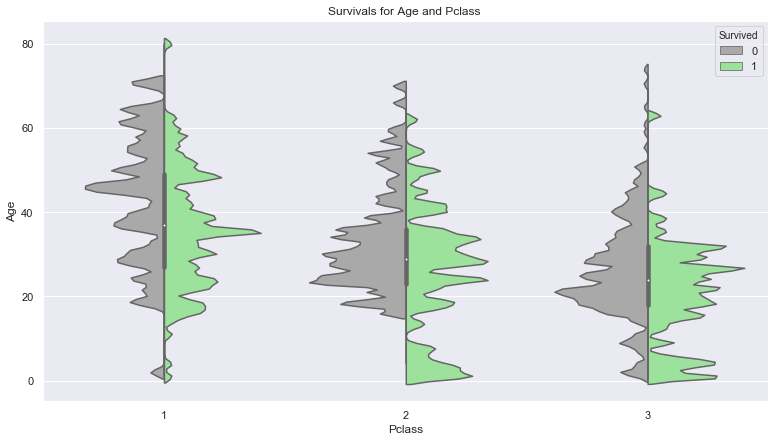

In [23]:
#choose color
cm_surv = ["darkgrey" , "lightgreen"]

#plot swarm
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=train_df , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

#plot violin
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=train_df, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

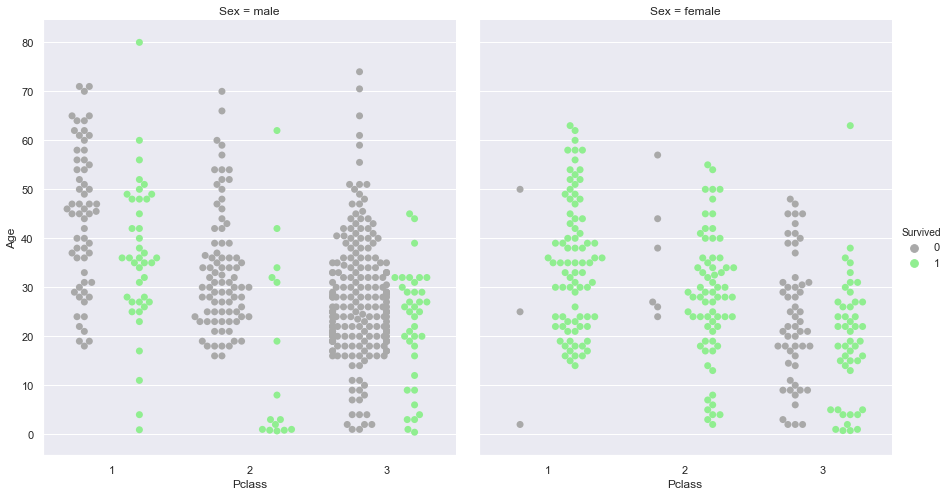

In [24]:
g = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train_df, kind="swarm", dodge=True, palette=cm_surv, height=7, aspect=.9, s=7)

##3.Feature Engineering & Data preprocessing
###3.1 Feature Engineering

In [25]:
for df in [train_df, test_df] :
    #Add columm FamilySize
    df['FamilySize'] = df['SibSp'] + df['Parch'] +1
    #Add columm Alone 
    df['Alone']=0
    df.loc[(df.FamilySize==1),'Alone'] = 1
 

In [26]:
for df in [train_df, test_df] :
    df['Age_band']=0
    df.loc[df['Age']<=16,'Age_band']=0
    df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
    df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
    df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
    df.loc[df['Age']>64,'Age_band']=4

In [27]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,2


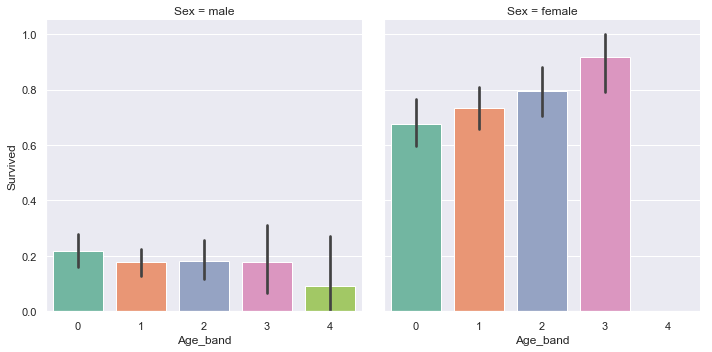

In [28]:
sns.catplot(x='Age_band',y='Survived',data=train_df,col='Sex', kind="bar", palette="Set2")
plt.show()


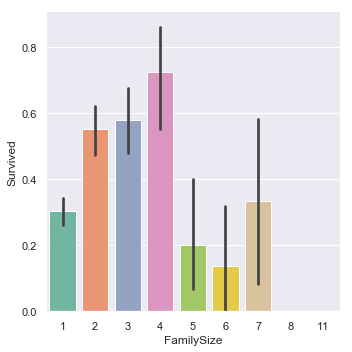

In [29]:
sns.catplot(x='FamilySize', y="Survived", data=train_df, kind='bar', palette='Set2')
plt.show()

In [30]:
for df in [train_df, test_df] :
    for i in df:
        df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations


In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Age_band,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,2,Mr


In [32]:
pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


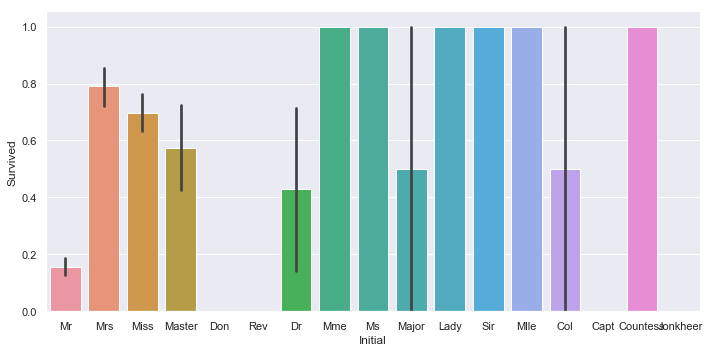

In [33]:
sns.catplot(x="Initial",y="Survived",data=train_df, kind="bar", aspect=2.0)

In [34]:
for df in [train_df, test_df]:
    df['Initial'].replace(['Mlle','Mme','Ms','Major','Lady','Countess','Jonkheer','Col','Rev','Sir','Don','Dona','Mrs','Capt'],['Miss','Miss','Miss','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Miss','Mr'],inplace=True)

In [35]:
pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Dr,Master,Miss,Mr,Other
Sex,,,,,
female,1,0,313,0,0
male,6,40,0,522,9


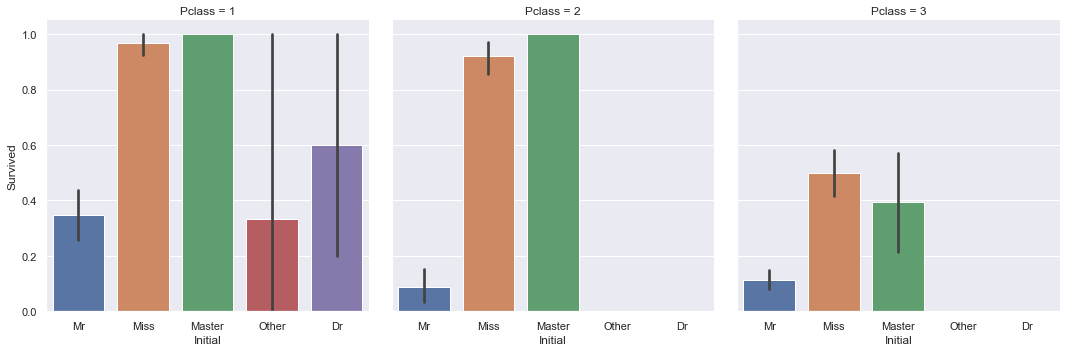

In [36]:
sns.catplot(x='Initial', y="Survived", data=train_df , kind="bar", col="Pclass")

In [37]:
missing_table(train_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [38]:
for data in [train_df, test_df]:
    data['Fare_Range']=pd.qcut(data['Fare'],4)
train_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [39]:
train_df.loc[train_df["Age"]<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Age_band,Initial,Fare_Range
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,3,0,0,Master,"(14.454, 31.0]"
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,4,0,0,Master,"(31.0, 512.329]"
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,4,0,0,Miss,"(14.454, 31.0]"
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,4,0,0,Miss,"(14.454, 31.0]"
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,3,0,0,Master,"(14.454, 31.0]"
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,2,0,0,Master,"(7.91, 14.454]"
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,3,0,0,Master,"(14.454, 31.0]"


In [40]:
for data in [train_df, test_df]:
    data['Fare_cat']=0
    data.loc[data['Fare']<=7.91,'Fare_cat']=0
    data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
    data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
    data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

In [41]:
missing_table(train_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [42]:
for df in [train_df, test_df]:

    # Age: use Initial to fill missing values
    df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']= df.Age[df.Initial=="Mr"].mean()
    df.loc[(df.Age.isnull())&(df.Initial=='Dr'),'Age']= df.Age[df.Initial=="Dr"].mean()
    df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']= df.Age[df.Initial=="Master"].mean()
    df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']= df.Age[df.Initial=="Miss"].mean()
    df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']= df.Age[df.Initial=="Other"].mean()
    df = df.drop('Name', axis=1)
    
    # Fare: use Pclass to fill fare
    df.loc[(df.Fare_cat.isnull())&(df.Pclass==1),'Fare_cat'] = df.Fare_cat[df.Pclass==1].mode()
    df.loc[(df.Fare_cat.isnull())&(df.Pclass==2),'Fare_cat'] = df.Fare_cat[df.Pclass==2].mode()
    df.loc[(df.Fare_cat.isnull())&(df.Pclass==3),'Fare_cat'] = df.Fare_cat[df.Pclass==3].mode()
    

# Embarked
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode().iloc[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode().iloc[0])

    

In [43]:
missing_table(train_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [44]:
#handling categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Pclass', 'Initial'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Pclass', 'Initial'], drop_first=True)

In [45]:
#removing all columns that we don't need
train_df.drop(['PassengerId','Name','Ticket', 'Cabin', 'Fare_Range','Fare','Alone','Age'],axis=1,inplace=True)
test_df.drop(['PassengerId','Name','Ticket', 'Cabin', 'Fare_Range','Fare','Alone','Age'],axis=1,inplace=True)

In [46]:
train_df.columns

Index(['Survived', 'SibSp', 'Parch', 'FamilySize', 'Age_band', 'Fare_cat',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3',
       'Initial_Master', 'Initial_Miss', 'Initial_Mr', 'Initial_Other'],
      dtype='object')

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(train_df.drop(['Survived'],axis=1))
scaled_features = scaler.transform(train_df.drop(['Survived'],axis=1))
train_df_sc = pd.DataFrame(scaled_features) # columns=df_train_ml.columns[1::])


# scaler.fit(df_test_ml)
scaled_features = scaler.transform(test_df)
test_df_sc = pd.DataFrame(scaled_features) # , columns=df_test_ml.columns)

/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [50]:
train_df

,Survived,SibSp,Parch,FamilySize,Age_band,Fare_cat,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Initial_Master,Initial_Miss,Initial_Mr,Initial_Other
0,0,1,0,2,1,0,1,0,1,0,1,0,0,1,0
1,1,1,0,2,2,3,0,0,0,0,0,0,1,0,0
2,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0
3,1,1,0,2,2,3,0,0,1,0,0,0,1,0,0
4,0,0,0,1,2,1,1,0,1,0,1,0,0,1,0
5,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0
6,0,0,0,1,3,3,1,0,1,0,0,0,0,1,0
7,0,3,1,5,0,2,1,0,1,0,1,1,0,0,0
8,1,0,2,3,1,1,0,0,1,0,1,0,1,0,0
9,1,1,0,2,0,2,0,0,0,1,0,0,1,0,0


In [53]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_test = test_df

X_sc = train_df_sc
y_sc = train_df['Survived']
X_test_sc = test_df_sc

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree


from sklearn.metrics import accuracy_score

In [52]:
from sklearn.model_selection import cross_val_score

In [54]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.83333333 0.85555556 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.86363636]
0.8327806151401657


In [55]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc_sc = cross_val_score(svc, X_sc, y_sc, cv=10, scoring='accuracy')
print(scores_svc_sc)
print(scores_svc_sc.mean())

[0.83333333 0.82222222 0.75280899 0.88764045 0.87640449 0.82022472
 0.82022472 0.7752809  0.85393258 0.875     ]
0.8317072409488141


In [56]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

[0.81111111 0.83333333 0.75280899 0.87640449 0.85393258 0.80898876
 0.80898876 0.78651685 0.85393258 0.82954545]
0.8215562932697764


,SibSp,Parch,FamilySize,Age_band,Fare_cat,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Initial_Master,Initial_Miss,Initial_Mr,Initial_Other
0,0,0,1,2,0,1,1,0,0,1,0,0,1,0
1,1,0,2,2,0,0,0,1,0,1,0,1,0,0
2,0,0,1,3,1,1,1,0,1,0,0,0,1,0
3,0,0,1,1,1,1,0,1,0,1,0,0,1,0
4,1,1,3,1,1,0,0,1,0,1,0,1,0,0
5,0,0,1,0,1,1,0,1,0,1,0,0,1,0
6,0,0,1,1,0,0,1,0,0,1,0,1,0,0
7,1,1,3,1,2,1,0,1,1,0,0,0,1,0
8,0,0,1,1,0,0,0,0,0,1,0,1,0,0
9,2,0,3,1,2,1,0,1,0,1,0,0,1,0


In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X_sc,y_sc,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.826051242764726


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X_sc,y_sc,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8159757689252072


In [62]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8193215866530472


In [124]:
from sklearn.model_selection import GridSearchCV
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

/Users/Cris/anaconda3/envs/kaggle_titanic/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [65]:
y_pred = gd.predict(X_test)
y_pred = np.round(y_pred).astype(int)
y_pred = y_pred.ravel()
 
test_df = pd.read_csv("./data/raw/test.csv")
# for submission
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred
    })
submission.to_csv('titanic.csv', index=False)

In [108]:
n = 0
k = 0 
s_list = []

with open(path) as f:
    l = f.readlines()
    n,k = l[0].split()

NameError: name 'path' is not defined

In [122]:
s_list = list(".SSSS...S.SS.SSS")
print(len(s_list))

s_3_i = []
s_3 = 0
s_2_i = []
s_2 = 0
s_1_i = []
s_1 = 0

for i in range(1,len(s_list)-1):
    if(s_list[i-1] == 'S' and s_list[i] == 'S' and s_list[i+1] == 'S'):
        s_3 += 1
        s_3_i.append(i)
    elif((s_list[i-1] == '.' and s_list[i] == 'S' and s_list[i+1] == 'S')or(s_list[i-1] == 'S' and s_list[i] == 'S' and s_list[i+1] == '.')or(s_list[i-1] == 'S' and s_list[i] == '.' and s_list[i+1] == 'S')):
        s_2 += 1
        s_2_i.append(i)
    elif((s_list[i-1] == '.' and s_list[i] == 'S' and s_list[i+1] == '.')or(s_list[i-1] == '.' and s_list[i] == '.' and s_list[i+1] == 'S')or(s_list[i-1] == 'S' and s_list[i] == '.' and s_list[i+1] == '.')):
        s_1 += 1
        s_1_i.append(i)
        


16


In [123]:
s_2

7

In [121]:
s_3_i

[2, 3, 10]